# Temperature Scaling Behavior over the Holocene

## Authors

Deborah Khider
<a href="https://orcid.org/0000-0001-7501-8430" target="_blank" rel="noopener noreferrer">
  <img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" alt="ORCID iD" style="vertical-align: text-bottom;"/>
</a>

Alexander James
<a href="https://orcid.org/0000-0001-8561-3188" target="_blank" rel="noopener noreferrer">
  <img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" alt="ORCID iD" style="vertical-align: text-bottom;"/>
</a>

## Preamble

Understanding scaling behavior in the climate system is important for several key reasons:
- **Bridging scales in observations in modeling**: the climate system is inherently multiscales, with local feedbacks (e.g., sea ice) influencing global circulation and vice-versa. Scaling analysis can help connecting small-scale processes to large-scale phenomena.
- **Characterizing natural variability**: Many climate variables (temperature precipitation) exhibit power-law scaling in their spectra, meaning variability depends on the timescale of observations. Recognizing these scaling laws can help researchers separate internal from external variability, identify regime shifts or nonlinear feedbacks, and understand persistence and memory in the climate system.
- **Improving model evaluation and downscaling**: Scaling properties provide diagnostics for evaluating how well models reproduce observed variability. If a model fails to capture observed scaling exponents, it may misrepresent key feedbacks or autocorrelation structures. In downscaling, scaling relationships help ensure that fine-scale reconstructions preserve realistic temporal and spatial variability.

In this notebook, we demonstrate the use of [the `Pyleoclim` software package](https://pyleoclim-util.readthedocs.io/en/latest/) to estimate the spectra from Holocene temperature records and estimate their scaling behavior.

<div style="
    padding: 10px; 
    background-color: #e7f3fe; 
    border-left: 6px solid #2196F3; 
    margin-bottom: 15px;">
  <strong>Note:</strong> This notebook was created with the help of an artificial intelligent (AI) assistant for paleoclimatology (PaleoPAL) that it currently (November 2025) under active development. Code and conclusions were reviewed by a human. Prompts to the AI are written in the markdown cells (preceded by @agent) and kept for transparency. Correction to the code is marked. The additional lines of code generated by PaleoPAL but not needed in the context of this notebook are commented out.
</div>

Technical skills involved:

- Loading data in the [LiPD](https://lipd.net) format using [the `PyLiPD` software](https://pylipd.readthedocs.io/en/latest/).
- Applying and interpreting spectral analysis in with [`Pyleoclim`](https://pyleoclim-util.readthedocs.io/en/latest/)
- Estimating scaling exponents from spectra.


### Data

The data is from the [Temperature 12k Database](https://www.nature.com/articles/s41597-020-0530-7) by Kaufman et al. (2020), stored in the Linked PaleoData ([LiPD](https://lipd.net)) format on the [LiPDVerse](https://lipdverse.org/project/temp12k/).

### Reading time
15 min

### Keywords
Pyleoclim; PyLiPD; Holocene; Scaling Behavior; Spectral Analysis.

Let's import the necessary packages:

In [1]:
# import the necessary packages
# Deal with downloading the LiPD files
import os
import requests
import zipfile
from pathlib import Path

#To mamipulate LiPD Files
from pylipd.lipd import LiPD

# Analysis
import pyleoclim as pyleo
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To save
import pickle

## Importing the Temp12k Database

The version of the database used in this notebook can be dowloaded [here](https://lipdverse.org/Temp12k/current_version/Temp12k1_1_0.zip). The following cell downloads the files and save them locally to a folder called `Temp12k`:

<div style="
    padding: 10px; 
    background-color: #fff3cd; 
    border-left: 6px solid #ffcc00; 
    margin: 10px 0;">
    <strong>Warning:</strong> You only need to run the cell below once. It will download the data locally. The rest of the notebook assumes that the data is organized according to the output of the cell below.
</div>


In [5]:
# Link to LiPD files
temp12_url = 'https://lipdverse.org/Temp12k/current_version/Temp12k1_1_0.zip'

# Download and extract
folder_path = Path("../data/Temp12k")
zip_path = folder_path.with_suffix('.zip')

# Step 1: Check if folder exists, create if not:
folder_path.mkdir(parents=True, exist_ok=True)
# Step 2: Check if folder is empy
if not any(folder_path.iterdir()):
    print("Folder is empty. Downloading data...")

    # Step 3: Download zip file
    response = requests.get(temp12_url)
    with open(zip_path, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded ZIP to {zip_path}")

    # Step 4: Extract zip contents into folder
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(folder_path)
    print(f"Extracted contents to {folder_path}")


The next step is to create a [`pylipd.LiPD` object](https://pylipd.readthedocs.io/en/latest/api.html#lipd-pylipd-lipd-lipd) from these files.

@agent code
Use PyLiPD to create a LiPD object from the files in the directory: "../data/Temp12k"

In [2]:
# This code snippet creates a LiPD object and loads data from the specified directory "../data/Temp12k". It then prints the names of all the datasets loaded into the LiPD object to verify that the data has been successfully imported.
# Auto-generated by PaleoPal CodeGenerationAgent with contextual search

# Import LiPD
#from pylipd.lipd import LiPD

# Create a LiPD object and load the data from the directory
lipd = LiPD()
lipd.load_from_dir("../data/Temp12k")

# Verify loaded datasets by printing their names
#print(lipd.get_all_dataset_names())

Loading 697 LiPD files


100%|██████████| 697/697 [00:17<00:00, 39.53it/s]

Loaded..


Next, let's get some of the essential information to work with these timeseries. `LiPD` objects have a [method called `get_timeseries_essentials`](https://pylipd.readthedocs.io/en/latest/api.html#pylipd.lipd.LiPD.get_timeseries_essentials) that can be useful in that regard.

@agent code
Use the method `get_timeseries_essentials` to load the information.

In [3]:
# This code snippet loads timeseries essentials from the Temp12k database using a LiPD object. It first ensures the data is loaded from the specified directory and then retrieves the timeseries essentials using the get_timeseries_essentials method, storing the result in a DataFrame for examination.
# Auto-generated by PaleoPal CodeGenerationAgent with contextual search

#from pylipd.lipd import LiPD

# Create a LiPD object if not already created
#lipd = LiPD()

# Load data from the directory if not already loaded
#lipd.load_from_dir('../data/Temp12k')

# Get the timeseries essentials
# This will return a pandas DataFrame or similar structure with timeseries information
#try:
df = lipd.get_timeseries_essentials()
    
    # Print the DataFrame to review the essential information
    #print(df_timeseries_essentials)
#except Exception as e:
    #print(f'An error occurred while getting timeseries essentials: {e}')

In [9]:
display(df.head())

,dataSetName,archiveType,geo_meanLat,geo_meanLon,geo_meanElev,paleoData_variableName,paleoData_values,paleoData_units,paleoData_proxy,paleoData_proxyGeneral,time_variableName,time_values,time_units,depth_variableName,depth_values,depth_units
0,MilandreCave.Affolter.2019,Speleothem,47.49,7.02,491.0,temperature,"[8.3, 8.9, 7.7, 7.9, 8.1, 8.5, 8.1, 7.4, 7.4, ...",degC,dD,isotopic,age,"[-19.5, 131.5, 138.5, 146.0, 151.0, 157.0, 164...",yr BP,None,None,None
1,MilandreCave.Affolter.2019,Speleothem,47.49,7.02,491.0,tempError,"[0.39, 0.39, 0.39, 0.39, 0.39, 0.26, 0.26, 0.2...",degC,None,None,age,"[-19.5, 131.5, 138.5, 146.0, 151.0, 157.0, 164...",yr BP,None,None,None
2,Hams.Bennett.1987,Lake sediment,43.24,-80.41,301.0,precipitation,"[882.0, 896.857, 878.286, 900.571, 872.143, 96...",mm/yr,pollen,pollen,age,"[-29, 24, 80, 136, 315, 512, 625, 753, 882, 10...",yr 14C BP,depth,"[806, 825, 845, 865, 875, 883, 890, 898, 906, ...",cm
3,Hams.Bennett.1987,Lake sediment,43.24,-80.41,301.0,temperature,"[-6.271, -6.529, -6.229, -6.457, -5.8, -5.443,...",degC,pollen,pollen,age,"[-29, 24, 80, 136, 315, 512, 625, 753, 882, 10...",yr 14C BP,depth,"[806, 825, 845, 865, 875, 883, 890, 898, 906, ...",cm
4,Hams.Bennett.1987,Lake sediment,43.24,-80.41,301.0,temperature,"[8.015, 7.7, 8.31, 7.798, 8.595, 8.849, 8.5, 8...",degC,pollen,pollen,age,"[-29, 24, 80, 136, 315, 512, 625, 753, 882, 10...",yr 14C BP,depth,"[806, 825, 845, 865, 875, 883, 890, 898, 906, ...",cm


Let's filter for temperature only:

@agent code
Filter the DataFrame to only keep temperature for `paleoData_variableName`

!!! This is not working

In [4]:
df_filt = df[df['paleoData_variableName']=='temperature']
print(f"We have {len(df_filt)} timeseries")

We have 2201 timeseries


## Load the resulting timeseries into Pyleoclim

Now that we have extracted the essential information from the LiPD files, let's put our timeseries into a [`MultipleGeoSeries` object](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.multiplegeoseries.MultipleGeoSeries) so we can work with them more easily:

@agent code
Using each row in df_filt, create a Pyleoclim MultipleGeoseries object

In [5]:
# This code creates a Pyleoclim MultipleGeoSeries object from each row in a filtered DataFrame (df_filt) using essential timeseries information. It iterates through the DataFrame rows, constructing a GeoSeries object for each row, which is then appended to a list. Finally, a MultipleGeoSeries object is created from this list, allowing for further paleoclimate analysis.
# Auto-generated by PaleoPal CodeGenerationAgent with contextual search

# Import necessary library
#import pyleoclim as pyleo

# Create a list to hold GeoSeries objects
ts_list = []

# Iterate over each row in the DataFrame containing filtered timeseries\# Create a GeoSeries object for each row
for _, row in df_filt.iterrows():
    if row['time_values'] is not None and row['paleoData_values'] is not None: #there seems to be missing entries in the database (added by DK)
        if np.all(np.isnan(row['time_values'])) == False and np.all(np.isnan(row['paleoData_values'])) == False: #check that not all the values are false (added by DK)
            ts = pyleo.GeoSeries(
                time=row['time_values'],
                value=row['paleoData_values'],
                time_name=row['time_variableName'],
                value_name=row['paleoData_variableName'],
                time_unit=row['time_units'],
                value_unit=row['paleoData_units'],
                lat=row['geo_meanLat'],
                lon=row['geo_meanLon'],
                elevation=row.get('geo_meanElev'),  # Use get to handle missing values
                observationType=row['paleoData_proxy'],
                archiveType=row['archiveType'],
                verbose=False,
                label=row['dataSetName'] + '_' + row['paleoData_variableName']
            )
            ts_list.append(ts)
        else:
            pass
    else:
        pass

# Create a MultipleGeoSeries object from the list of GeoSeries objects
geoms = pyleo.MultipleGeoSeries(ts_list, label='Temp12k', time_unit='years BP')

# Display or process the MultipleGeoSeries object
# print(multiple_geoseries)  # Uncomment to see details of the object

In [38]:
print(f"We have {len(geoms.series_list)} timeseries left")

We have 2182 timeseries left


Let's map the location of these records!

@agent code 
Map the records contained in geoms. 

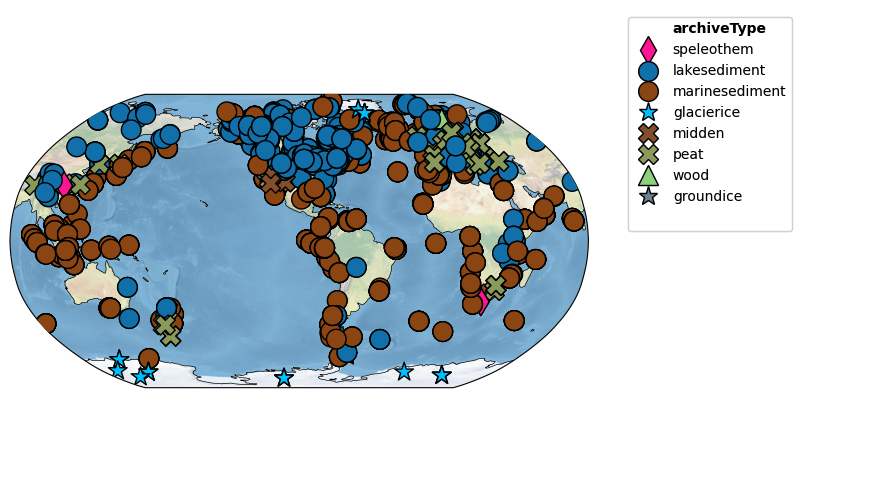

In [39]:
# This code snippet uses the MultipleGeoSeries object 'geoms' to create a map of the records using the 'map' method in Pyleoclim. The records are displayed in a Robinson projection with a specified figure size and color-coded by 'archiveType'.
# Auto-generated by PaleoPal CodeGenerationAgent with contextual search

# This code maps the records contained in the 'geoms' which is a MultipleGeoSeries object.
# Ensure that the pylipd and pyleoclim packages are installed and available for import.

# Import necessary package for plotting geopraphically distributed data
#import pyleoclim as pyleo

# 'geoms' is assumed to be a MultipleGeoSeries object already created from the DataFrame 'df_filt'

# Map the records
fig, ax = geoms.map(projection='Robinson', figsize=[12, 6], hue='archiveType')


## Estimating scaling behavior using `Pyleoclim`

### Applying the WWZ method
Now we are ready to perform spectral analysis on our `MultipleGeoSeries` object! For this application, we need to use the Weighted Wavelet Z-Transform ([Kirchner and Neal, 2013](www.pnas.org/content/110/30/12213)) for power spectral density (PSD) calculation since the Lomb-Scargle periodogram has a known bias when estimating the slope. 

For analysis, each timeseries will be standardized prior to PSD estimation.

<div style="
    padding: 10px; 
    background-color: #fff3cd; 
    border-left: 6px solid #ffcc00; 
    margin: 10px 0;">
    <strong>Warning:</strong> This cell may take 20min to run. You may skip this step and load the data directly from the pickle file in the next step.
</div>

@agent code
Perform spectral analysis on geoms using the WWZ method and using a log frequency vector. Standardize before spectral analysis.

In [8]:
# This code performs spectral analysis on a standardized MultipleGeoSeries object using the Weighted Wavelet Z-Transform (WWZ) method with a log frequency vector. The standardized data, 'geoms_standardized', is analyzed and the resulting Power Spectral Density (PSD) is plotted.
# Auto-generated by PaleoPal CodeGenerationAgent with contextual search

# Import necessary packages
#import pyleoclim as pyleo
#import matplotlib.pyplot as plt

# Standardize the 'geoms' MultipleGeoSeries object before spectral analysis
#geoms_standardized = geoms.standardize(keep_log=False) #keep log is not in MultipleSeries
geoms_standardized = geoms.standardize()

# Perform spectral analysis using the WWZ method with a log frequency vector

psd_wwz = geoms_standardized.spectral(method='wwz', freq='log')

# Plot the resultant Power Spectral Density (PSD) (might be too many to plot)
#fig, ax = psd_wwz.plot(title='PSD using WWZ method with log frequency vector')
#plt.show()

Performing spectral analysis on individual series:   0%|          | 0/2182 [00:00<?, ?it/s]OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routi

Since this calculation takes a while to perform, let's pickle the results for future use:

In [ ]:
#with open("../data/temp12k_scaling.pkl", "wb") as f:   # 'wb' = write binary
    #pickle.dump(psd_wwz, f)

### Scaling slope estimation

Once the PSD is calculated for each record, we may estimate the scaling slope $\beta$ of the PSD curves using the [`.beta_est()` method](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.psds.MultiplePSD.beta_est).

We can specify two arguments for the `.beta_est()` method:
1. `fmin`: which defines the minimum frequency edge of the range for $\beta$ estimation
2. `fmax`: which defines the maxmimum frequency edge of the range for $\beta$ estimation

We will calculate three sets of the scaling factors:
1. `beta_S`: period over [10, 100] yrs
2. `beta_M`: period over [100, 1000] yrs
3. `beta_L`: period over [1000, 10000] yrs

In [7]:
#If needed, re-open the pickle file. 
with open("../data/temp12k_scaling.pkl", "rb") as f:   # 'rb' = read binary
    psd_wwz = pickle.load(f)


EOFError: Ran out of input

@agent code 
For the psd_wwz object, can you calculate the scaling exponent. I want to calculate it with various values for the fmin and fmax parameters (fmin,fmax) as (1/100, 1/10), (1/1000, 1/100) and (1/10000, 1/1000). The resulting scaling exponent should be stored in the following variables: beta_S, beta_M and beta_L.

In [ ]:
# This code calculates the scaling exponent (beta) for a Power Spectral Density (PSD) object using the beta estimation method provided by the Pyleoclim library. The calculation is performed over three frequency ranges to yield beta_S, beta_M, and beta_L, which represent scaling exponents over short, medium, and long periods, respectively. The results are stored in the variables beta_S, beta_M, and beta_L, and are printed to the console.
# Auto-generated by PaleoPal CodeGenerationAgent with contextual search

# Calculate the scaling exponent (beta) for the psd_wwz object
# Import necessary libraries
#import pyleoclim as pyleo

# Define frequency bounds for beta calculations
frequency_ranges = [
    {'name': 'S', 'fmin': 1/100, 'fmax': 1/10},
    {'name': 'M', 'fmin': 1/1000, 'fmax': 1/100},
    {'name': 'L', 'fmin': 1/10000, 'fmax': 1/1000}
]

# Initialize dictionary to store beta values
beta_values = {}

# Calculate beta for each frequency range
for freq_range in frequency_ranges:
    # Calculate beta using the beta_est method
    beta_est_res = psd_wwz.beta_est(fmin=freq_range['fmin'], fmax=freq_range['fmax'])
    
    # Store result in the dictionary using the frequency range name as the key
    beta_values[f"beta_{freq_range['name']}"] = beta_est_res

# Retrieve the calculated beta values
beta_S = beta_values['beta_S'].beta_est_res['beta']
beta_M = beta_values['beta_M'].beta_est_res['beta']
beta_L = beta_values['beta_L'].beta_est_res['beta']

# Print the results
print(f"beta_S: {beta_S}")
print(f"beta_M: {beta_M}")
print(f"beta_L: {beta_L}")

In [66]:
with open('../data/temp_12k_psd','rb') as handle:
    psd = pickle.load(handle)

beta_S = []
beta_M = []
beta_L = []

for dsn, psd_obj in psd.items():
    beta_S.append(
        psd_obj.beta_est(fmin=1/100, fmax=1/10).beta_est_res['beta']
    )
    beta_M.append(
        psd_obj.beta_est(fmin=1/1000, fmax=1/100).beta_est_res['beta']
    )
    beta_L.append(
        psd_obj.beta_est(fmin=1/10000, fmax=1/1000).beta_est_res['beta']
    )
    
beta_S = np.array(beta_S)
beta_M = np.array(beta_M)
beta_L = np.array(beta_L)

beta_S = beta_S[~np.isnan(beta_S)]
beta_M = beta_M[~np.isnan(beta_M)]
beta_L = beta_L[~np.isnan(beta_L)]

nS = len(beta_S)
nM = len(beta_M)
nL = len(beta_L)
print(nS, nM, nL)

7 78 95


## Visualization with `Pyleoclim`

Now the calculation is done, let's visualize the result.

First, it's easy to set the plotting style with `Pyleoclim`, simply use `pyleo.set_style()`, which has two important arguments:
1. `style` - a text string to specify which plotting style to use
2. `font_scale` - which can be used to scale the font sizes consistently for a figure
Here we will use the default `journal` plotting style, with `font_scale=1.5` for better readability.
For more details of `pyleo.set_style()`, see [this notebook](https://github.com/LinkedEarth/Pyleoclim_util/blob/Development/example_notebooks/plot_styles.ipynb).

`Pyleoclim` makes it also super easy for quick visualization of the `Series()` and `PSD()` objects.
It's simply `Series.plot()` or `PSD.plot()`.
Regarding `PSD.plot()`, we have several important arguments:
1. `ax` - if specified, the plot will be output to an existing `matplotlib.axes` object
2. `xlim` - if specified, the x-axis of the plot will be limited within the specified range
3. `ylim` - if specified, the y-axis of the plot will be limited within the specified range
4. `xlabel` - if specified, the x-axis will be labeled with the specified text string
5. `ylabel` - if specified, the y-axis will be labeled with the specified text string
6. `color` - if specified, the curve will be colored with the specified color
7. `mute` - if True, the figure object `fig` will not be visible, until `pyleo.showfig(fig)` is called

Note that we will specify `ax` when loop over records, so as to overlap multiple PSD curves into one figure, and we show how to do it below.

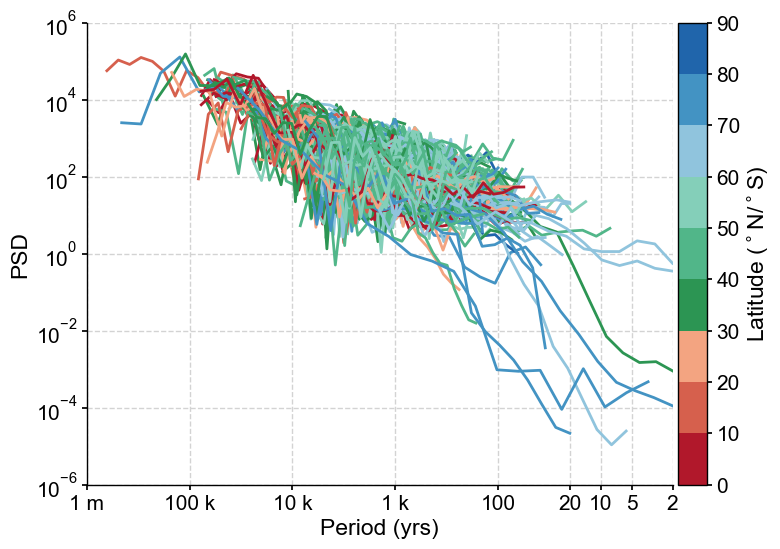

In [67]:
# define a colormap for different latitudes
with open('../data/temp_12k_lats', 'rb') as f:
    lats = pickle.load(f)
    
lat_list = [v for k, v in lats.items()]
cmap = sns.color_palette("RdBu_r", 9)[::-1]
cmap_green = sns.color_palette("BuGn_r")
cmap[3:6] = cmap_green[1:4]
color_ind_list = np.abs(lat_list)//10
color_ind_list = color_ind_list.astype(int)

# plot the PSD curves colored according to latitudes
    
# set the plotting style
pyleo.set_style(style='journal', font_scale=1.5)

period_ticks = [2, 5, 10, 20, 100, 1000, 10000, 100000, 1000000]
period_ticklabels = ['2', '5', '10', '20', '100', '1 k', '10 k', '100 k', '1 m']
    
dsns = psd.keys()
psd_obj = psd[list(dsns)[0]]
fig, ax = psd_obj.plot(figsize=[8, 6]) # plot the first PSD curve
for dsn, psd_obj in psd.items():
    # loop over and plot the PSD curves of other records
    if dsn == list(dsns)[0]:
        pass
    else:
        i = list(dsns).index(dsn)
        psd_obj.plot(
            ax=ax, xlim=[1e6, 1e1], ylim=[1e-6, 1e6],
            xlabel='Period (yrs)', ylabel='PSD',
            color=cmap[color_ind_list[i]],
        )
        
ax.set_xticks(period_ticks)
ax.set_xticklabels(period_ticklabels)
        
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
clr_map = mpl.colors.ListedColormap(cmap)
cax = divider.append_axes("right", size="5%", pad=0.05)
bounds = np.linspace(0, 90, 10)
norm = mpl.colors.Normalize(vmin=bounds[0], vmax=bounds[-1])
cb = mpl.colorbar.ColorbarBase(cax, cmap=clr_map, orientation='vertical',norm=norm,boundaries=bounds)
cb.set_label(r'Latitude ($^\circ$N/$^\circ$S)')

The PSD curves are now plotted, it's time to visualize the estimated scaling slopes - the $\beta$ values.

Below we show how to plot KDE of the $\beta$ values of those PSD curves utilizating another visualization package [seaborn](https://seaborn.pydata.org).

Text(0.5, 0, '$\\beta$')

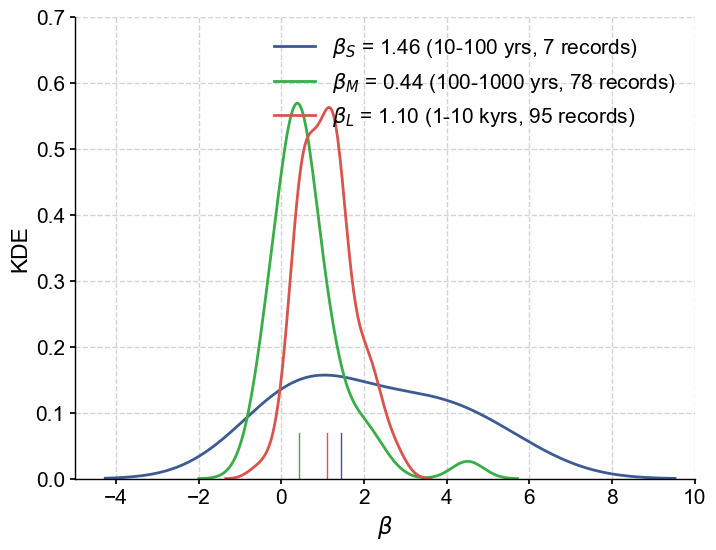

In [68]:
# set the plotting style
pyleo.set_style(style='journal', font_scale=1.5)

fig, ax = plt.subplots(figsize=[8, 6])
med_s = np.median(beta_S)
med_m = np.median(beta_M)
med_l = np.median(beta_L)
n_s = beta_S.shape[0]
n_m = beta_M.shape[0]
n_l = beta_L.shape[0]

ax.set_xlim([-5, 10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

g1 = sns.kdeplot(beta_S, shade=False, color=sns.xkcd_rgb['denim blue'], linestyle='-',
                 label=r'$\beta_S$ = {:.2f} (10-100 yrs, {} records)'.format(med_s, n_s))
g1.axvline(x=med_s, ymin=0, ymax=0.1, linewidth=1, color=sns.xkcd_rgb['denim blue'],
           linestyle='-')

g2 = sns.kdeplot(beta_M, shade=False, color=sns.xkcd_rgb['medium green'], linestyle='-',
                 label=r'$\beta_M$ = {:.2f} (100-1000 yrs, {} records)'.format(med_m, n_m))
g2.axvline(x=med_m, ymin=0, ymax=0.1, linewidth=1, color=sns.xkcd_rgb['medium green'], linestyle='-')

g3 = sns.kdeplot(beta_L, shade=False, color=sns.xkcd_rgb['pale red'], linestyle='-',
                 label=r'$\beta_L$ = {:.2f} (1-10 kyrs, {} records)'.format(med_l, n_l))
g3.axvline(x=med_l, ymin=0, ymax=0.1, linewidth=1, color=sns.xkcd_rgb['pale red'], linestyle='-')

ax.set_ylim(0, 0.7)
ax.legend(fontsize=15, loc='upper right',  bbox_to_anchor=(1, 1))
ax.set_ylabel('KDE')
ax.set_xlabel(r'$\beta$')

We see that scaling exponents cover a broad range. Similar methods can be applied to explore how scaling behavior is affected by various factors, including archive type.  

## References

Kaufman, D., McKay, N., Routson, C. et al. Holocene global mean surface temperature, a multi-method reconstruction approach. Sci Data 7, 201 (2020). https://doi.org/10.1038/s41597-020-0530-7

Kirchner, J.W.  & Neal, C.  Universal fractal scaling in stream chemistry and its implications for solute transport and water quality trend detection, Proc. Natl. Acad. Sci. U.S.A. 110 (30) 12213-12218, https://doi.org/10.1073/pnas.1304328110 (2013).